# Weekend Problem-1

# Image Classification with Deep Learning

In [1]:
import keras 
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [2]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print("X-Train:",xtrain.shape)
print()
print("Y-Train:",ytrain.shape)
print()
print("X-Test:",xtest.shape)
print()
print("Y-Test:",ytest.shape)

X-Train: (60000, 28, 28)

Y-Train: (60000,)

X-Test: (10000, 28, 28)

Y-Test: (10000,)


In [3]:
xtrain=xtrain.reshape(60000,28*28)
xtest=xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [4]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [5]:
xtrain=xtrain/255.
xtest=xtest/255.

In [6]:
import keras
num_classes=10
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [7]:
ytrain.shape

(60000, 10)

In [8]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [10]:
history=model.fit(xtrain,ytrain,
                 batch_size=128,
                 epochs=20,
                 verbose=2,
                 validation_data=(xtest,ytest))

score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 7s - loss: 0.5620 - accuracy: 0.7923 - val_loss: 0.4916 - val_accuracy: 0.8179 - 7s/epoch - 16ms/step
Epoch 2/20
469/469 - 6s - loss: 0.3872 - accuracy: 0.8566 - val_loss: 0.4003 - val_accuracy: 0.8599 - 6s/epoch - 13ms/step
Epoch 3/20
469/469 - 6s - loss: 0.3404 - accuracy: 0.8737 - val_loss: 0.3775 - val_accuracy: 0.8642 - 6s/epoch - 13ms/step
Epoch 4/20
469/469 - 6s - loss: 0.3128 - accuracy: 0.8837 - val_loss: 0.3957 - val_accuracy: 0.8601 - 6s/epoch - 14ms/step
Epoch 5/20
469/469 - 7s - loss: 0.2910 - accuracy: 0.8910 - val_loss: 0.4062 - val_accuracy: 0.8587 - 7s/epoch - 14ms/step
Epoch 6/20
469/469 - 7s - loss: 0.2731 - accuracy: 0.8968 - val_loss: 0.3717 - val_accuracy: 0.8711 - 7s/epoch - 15ms/step
Epoch 7/20
469/469 - 7s - loss: 0.2621 - accuracy: 0.9004 - val_loss: 0.3854 - val_accuracy: 0.8725 - 7s/epoch - 15ms/step
Epoch 8/20
469/469 - 7s - loss: 0.2505 - accuracy: 0.9044 - val_loss: 0.3728 - val_accuracy: 0.8720 - 7s/epoch - 15ms/step
Epoch 9/20
469/4

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ypred=model.predict(xtest)
ypred =(ypred>0.5)
list(ypred)

313/313 [==============================] - 1s 4ms/step


[array([False, False, False, False, False, False, False, False, False,
         True]),
 array([False, False,  True, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False, False, False, False, False,  True, False, False, False,
        False]),
 array([False, False, False, False, False, False, False,  True, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, Fal

In [17]:
print('classification report:\n',classification_report(ytest,ypred))

classification report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.78      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.79      0.85      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.99      0.95      0.97      1000
           9       0.97      0.95      0.96      1000

   micro avg       0.90      0.88      0.89     10000
   macro avg       0.90      0.88      0.89     10000
weighted avg       0.90      0.88      0.89     10000
 samples avg       0.88      0.88      0.88     10000



C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import multilabel_confusion_matrix
print('confusion matrix:\n', multilabel_confusion_matrix(ytest, ypred))

confusion matrix:
 [[[8859  141]
  [ 219  781]]

 [[8989   11]
  [  24  976]]

 [[8850  150]
  [ 223  777]]

 [[8901   99]
  [  97  903]]

 [[8770  230]
  [ 149  851]]

 [[8983   17]
  [  32  968]]

 [[8751  249]
  [ 298  702]]

 [[8943   57]
  [  25  975]]

 [[8989   11]
  [  51  949]]

 [[8967   33]
  [  48  952]]]


# Weekend Problem-2

# Predicting House Prices with neural networks

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [47]:
data = pd.read_csv('house.csv')
data.head()

,Area,Total Rooms,Bedrooms,Bathroom,Amount(in rupees)
0,2104,3,1,2,399900
1,1600,3,2,2,329900
2,2400,3,2,2,369000
3,1416,2,1,1,232000
4,3000,4,2,2,539900


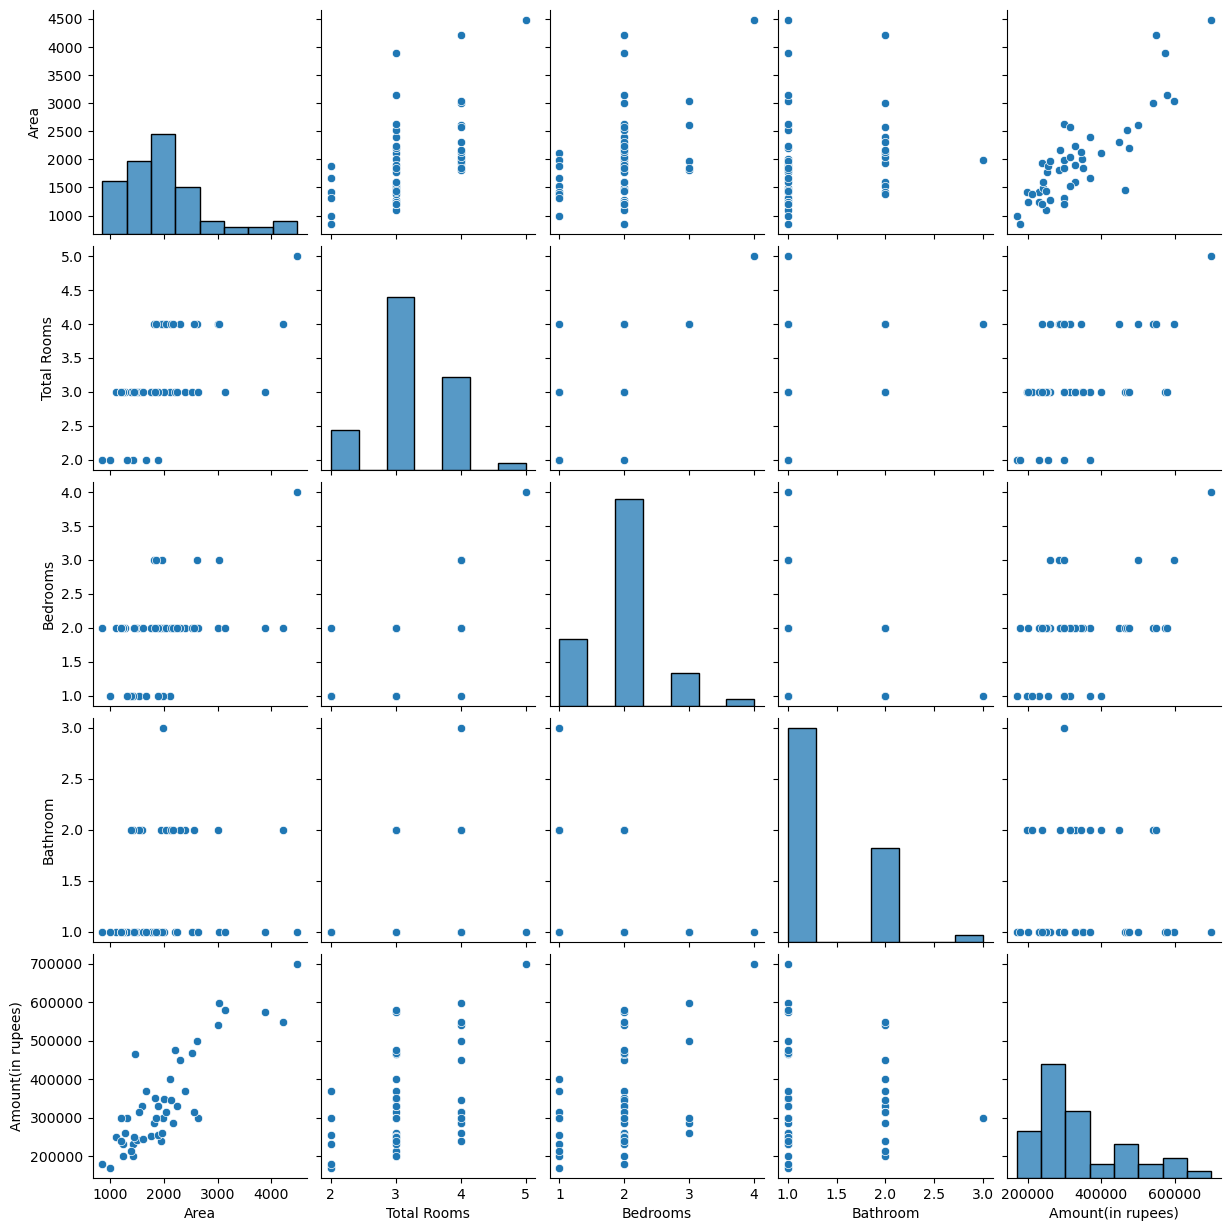

In [48]:
sns.pairplot(data)

In [49]:
data.isna().sum()

Area                 0
Total Rooms          0
Bedrooms             0
Bathroom             0
Amount(in rupees)    0
dtype: int64

In [50]:
objcol=data.select_dtypes(include = 'object')

In [51]:
for i in objcol:
    data[i] = data[i].map({'yes':1 ,'no':0})

In [52]:
data.head()

,Area,Total Rooms,Bedrooms,Bathroom,Amount(in rupees)
0,2104,3,1,2,399900
1,1600,3,2,2,329900
2,2400,3,2,2,369000
3,1416,2,1,1,232000
4,3000,4,2,2,539900


In [53]:
x=data.iloc[:,:4]
x.head()

,Area,Total Rooms,Bedrooms,Bathroom
0,2104,3,1,2
1,1600,3,2,2
2,2400,3,2,2
3,1416,2,1,1
4,3000,4,2,2


In [54]:
y=data.iloc[:,-1:]
y.head()

,Amount(in rupees)
0,399900
1,329900
2,369000
3,232000
4,539900


In [55]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(37, 4)

(37, 1)

(10, 4)

(10, 1)


In [57]:
model = Sequential()
model.add(Dense(11, input_shape=(4,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                55        
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
2/2 [==============================] - 1s 5ms/step - loss: 130856345600.0000 - mean_squared_error: 130856345600.0000
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: 130855600128.0000 - mean_squared_error: 130855600128.0000
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 130854871040.0000 - mean_squared_error: 130854871040.0000
Epoch 4/30
2/2 [==============================] - 0s 5ms/step - loss: 130854182912.0000 - mean_squared_error: 130854182912.0000
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: 130853470208.0000 - mean_squared_error: 130853470208.0000
Epoch 6/30
2/2 [==============================] - 0s 6ms/step - loss: 130852806656.0000 - mean_squared_error: 130852806656.0000
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 130852052992.0000 - mean_squared_error: 130852052992.0000
Epoch 8/30
2/2 [==============================] - 0s 6ms/step - loss: 130851405824.0000 - mean_squared_e

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

pred= model.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred)))
print(r2_score(ytest,pred))

1/1 [==============================] - 0s 61ms/step
363840.30349331914
-7.288034154531658
